# This model predicts bug resolution--fixed or not fixed

In [53]:
#load the dataset
import pandas as pd
code_bugs_df = pd.read_csv('Code_bugs.csv')

In [54]:
code_bugs_df.describe()
code_bugs_df.info()
code_bugs_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Issue Type  1000 non-null   object
 1   Issue key   1000 non-null   object
 2   Issue id    1000 non-null   int64 
 3   Summary     1000 non-null   object
 4   Assignee    594 non-null    object
 5   Reporter    1000 non-null   object
 6   Priority    1000 non-null   object
 7   Status      1000 non-null   object
 8   Resolution  657 non-null    object
 9   Created     1000 non-null   object
 10  Updated     1000 non-null   object
 11  Due Date    5 non-null      object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


,Issue Type,Issue key,Issue id,Summary,Assignee,Reporter,Priority,Status,Resolution,Created,Updated,Due Date
0,Bug,SPARK-51910,13616321,Optimize CodeGenerator#updateAndGetCompilation...,NaN,xleesf,Major,Closed,Invalid,25/Apr/25 1:54,25/Apr/25 2:16,NaN
1,Bug,SPARK-51360,13610235,Spark counts the total no of records twice in ...,NaN,Hande,Critical,Closed,Workaround,01/Mar/25 8:01,03/Mar/25 14:08,NaN
2,Bug,SPARK-50816,13604934,3.5.4 Spark Apache release is not verifiable,dongjoon,vrozov,Blocker,Closed,Fixed,14/Jan/25 21:59,15/Jan/25 20:01,NaN
3,Bug,SPARK-50475,13600688,NullPointerException when saving a df with 'no...,NaN,cedriccuypers,Trivial,Closed,Not A Bug,03/Dec/24 8:31,19/Dec/24 7:51,NaN
4,Bug,SPARK-50420,13599989,Executor memory config is incorrect when multi...,NaN,Terry1897,Major,Closed,Duplicate,26/Nov/24 3:32,27/Nov/24 2:57,NaN
5,Bug,SPARK-50419,13599988,Executor memory config is incorrect when multi...,NaN,Terry1897,Major,Closed,Duplicate,26/Nov/24 3:31,27/Nov/24 2:57,NaN
6,Bug,SPARK-49465,13590502,Fix example props override in helm chart opera...,NaN,zhou_jiang,Major,Closed,Duplicate,29/Aug/24 23:14,31/Aug/24 18:51,NaN
7,Bug,SPARK-49453,13590393,spark-kubernetes-operator-dynamic-configuratio...,NaN,qitan,Trivial,Closed,Duplicate,29/Aug/24 3:53,31/Aug/24 18:49,NaN
8,Bug,SPARK-49055,13587272,Investigate OrcEncryptionSuite UnsatisfiedLink...,NaN,LuciferYang,Major,Closed,Not A Problem,30/Jul/24 4:56,30/Jul/24 5:46,NaN
9,Bug,SPARK-48417,13580406,Filesystems do not load with spark.jars.packag...,NaN,ravidalal,Major,Closed,Not A Problem,24/May/24 20:40,24/May/24 21:23,NaN


In [55]:
print(code_bugs_df.isna().sum().sort_values())

Issue Type      0
Issue key       0
Issue id        0
Summary         0
Reporter        0
Priority        0
Status          0
Created         0
Updated         0
Resolution    343
Assignee      406
Due Date      995
dtype: int64


Resolution
Fixed               591
Not A Problem        16
Duplicate            16
Invalid              14
Not A Bug             8
Won't Fix             5
Workaround            2
Won't Do              2
Incomplete            1
Cannot Reproduce      1
Resolved              1
Name: count, dtype: int64
Priority
Major       817
Minor       119
Critical     34
Blocker      20
Trivial      10
Name: count, dtype: int64
Status
Resolved       637
Open           336
Closed          20
Reopened         5
In Progress      2
Name: count, dtype: int64


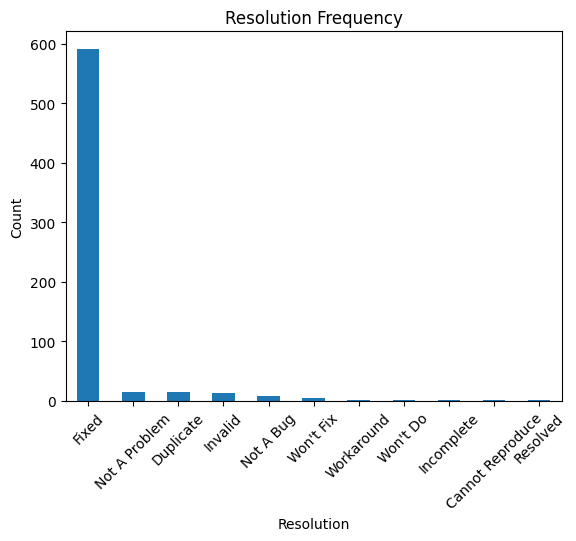

In [56]:
import matplotlib.pyplot as plt
# Count how many times each resolution occurs
print(code_bugs_df['Resolution'].value_counts())
print(code_bugs_df['Priority'].value_counts())
print(code_bugs_df['Status'].value_counts())


# Bar plot to visualize
code_bugs_df['Resolution'].value_counts().plot(kind='bar', title='Resolution Frequency')
plt.xlabel('Resolution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [57]:
code_bugs_df.duplicated().sum()

np.int64(0)

C:\Users\LENOVE\AppData\Local\Temp\ipykernel_30612\3322370526.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  code_bugs_df['Created'] = pd.to_datetime(code_bugs_df['Created'])
C:\Users\LENOVE\AppData\Local\Temp\ipykernel_30612\3322370526.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  code_bugs_df['Updated'] = pd.to_datetime(code_bugs_df['Updated'])


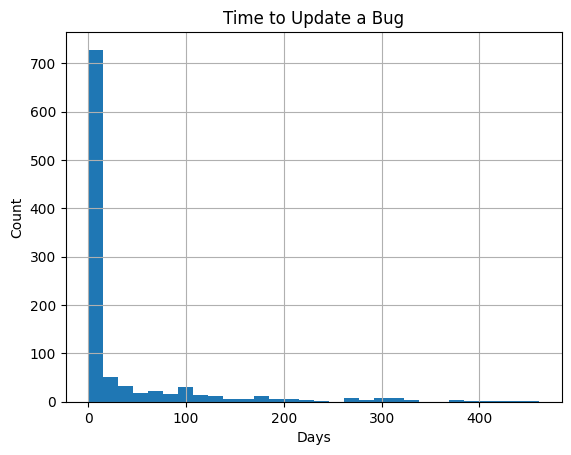

In [58]:
code_bugs_df['Created'] = pd.to_datetime(code_bugs_df['Created'])
code_bugs_df['Updated'] = pd.to_datetime(code_bugs_df['Updated'])

# Time taken to update (in days)
code_bugs_df['Time_to_Update'] = (code_bugs_df['Updated'] - code_bugs_df['Created']).dt.days

code_bugs_df['Time_to_Update'].hist(bins=30)
plt.title("Time to Update a Bug")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

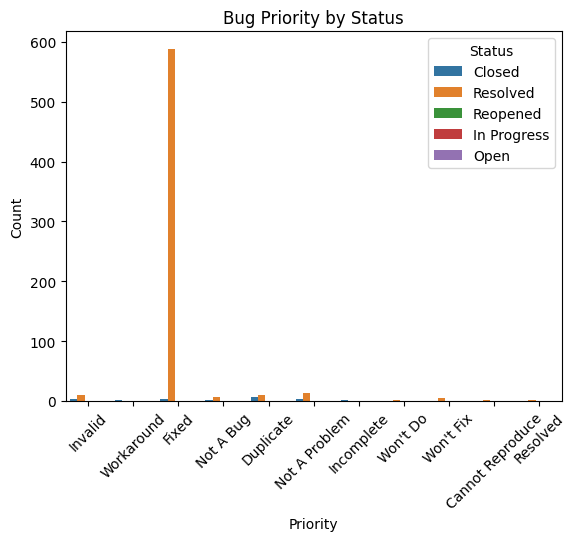

In [59]:
import seaborn as sns
sns.countplot(data=code_bugs_df, x='Resolution', hue='Status')
plt.title("Bug Priority by Status")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


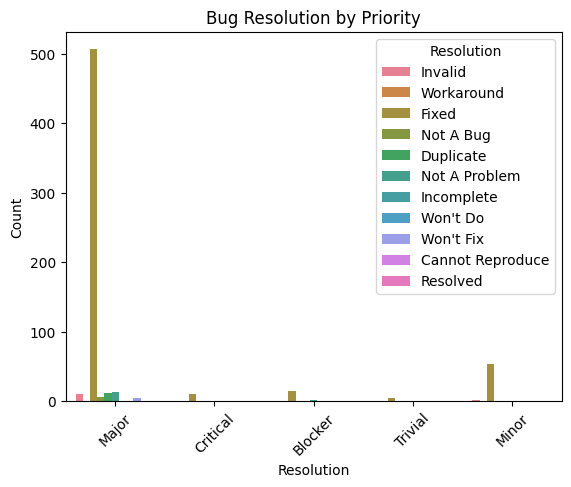

In [60]:
sns.countplot(data=code_bugs_df, x='Priority', hue='Resolution')
plt.title("Bug Resolution by Priority")
plt.xlabel("Resolution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

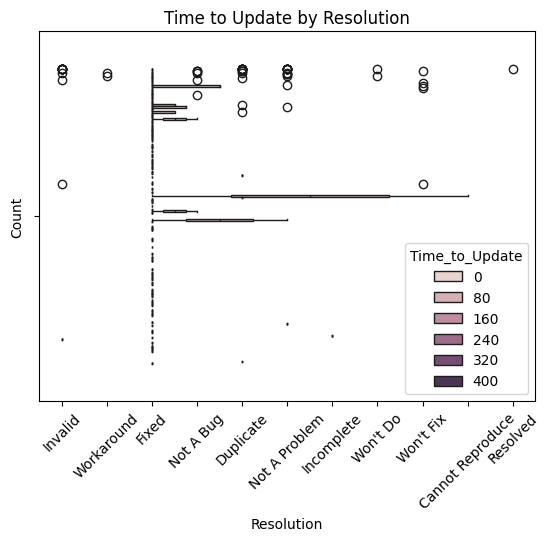

In [61]:
sns.boxplot(data=code_bugs_df, x='Resolution', hue='Time_to_Update')
plt.title("Time to Update by Resolution")
plt.xlabel("Resolution")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

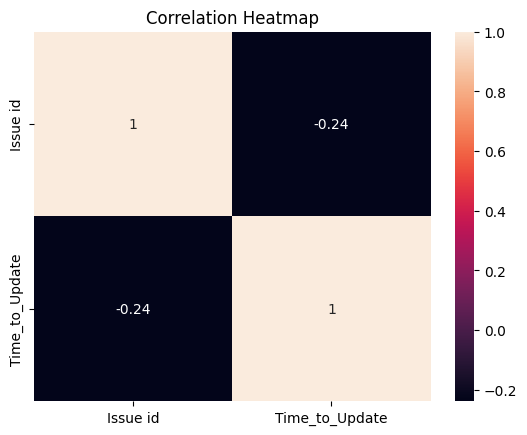

In [62]:
code_bugs_df.corr(numeric_only=True)
sns.heatmap(code_bugs_df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

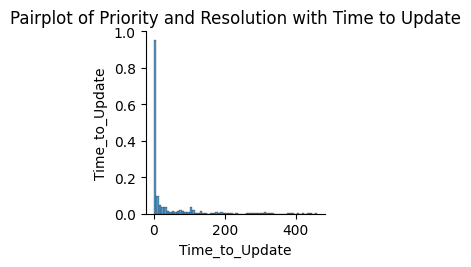

In [63]:
sns.pairplot(code_bugs_df[['Time_to_Update', 'Priority', 'Resolution']])
plt.title("Pairplot of Priority and Resolution with Time to Update")
plt.show()


In [64]:
threshold = 0.05 * len(code_bugs_df)
cols_to_drop = code_bugs_df.columns[code_bugs_df.isna().sum() <= threshold]
print(f"Columns with less than 5% : {cols_to_drop}")

Columns with less than 5% : Index(['Issue Type', 'Issue key', 'Issue id', 'Summary', 'Reporter',
       'Priority', 'Status', 'Created', 'Updated', 'Time_to_Update'],
      dtype='object')


In [65]:
code_bugs_df = code_bugs_df.drop(columns=["Due Date","Issue key","Issue id","Summary","Assignee","Reporter","Issue Type","Created","Updated"])

In [66]:
print(code_bugs_df.isna().sum().sort_values())

Priority            0
Status              0
Time_to_Update      0
Resolution        343
dtype: int64


In [67]:
code_bugs_df.dropna(subset=['Resolution'], inplace=True)

In [68]:
print(code_bugs_df.isna().sum().sort_values())

Priority          0
Status            0
Resolution        0
Time_to_Update    0
dtype: int64


In [69]:
code_bugs_df_cleaned = code_bugs_df.to_csv('Code_bugs_cleaned.csv', index=False)

In [70]:
def simplify_resolution(val):
    if val == 'Fixed':
        return 'Fixed'
    else:
        return 'Other'

code_bugs_df['Resolution'] = code_bugs_df['Resolution'].apply(simplify_resolution)


In [71]:
def simplify_priority(val):
    if val in ['Blocker', 'Critical']:
        return 'High'
    elif val in ['Major']:
        return 'Medium'
    else:
        return 'low'
code_bugs_df['Priority'] = code_bugs_df['Priority'].apply(simplify_priority)

In [72]:
def simplify_Status(val):
    if val in ['Resolved', 'Closed']:
        return 'Resolved'
    else:
        return 'Open'
code_bugs_df['Status'] = code_bugs_df['Status'].apply(simplify_Status)

In [73]:
code_bugs_df.head(10)

,Priority,Status,Resolution,Time_to_Update
0,Medium,Resolved,Other,0
1,High,Resolved,Other,2
2,High,Resolved,Fixed,0
3,low,Resolved,Other,15
4,Medium,Resolved,Other,0
5,Medium,Resolved,Other,0
6,Medium,Resolved,Other,1
7,low,Resolved,Other,2
8,Medium,Resolved,Other,0
9,Medium,Resolved,Other,0


In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
code_bugs_df['Priority'] = le.fit_transform(code_bugs_df['Priority'])
code_bugs_df['Status'] = le.fit_transform(code_bugs_df['Status'])
code_bugs_df['Resolution'] = le.fit_transform(code_bugs_df['Resolution'])  # Target

In [75]:
code_bugs_df.head(10)

,Priority,Status,Resolution,Time_to_Update
0,1,0,1,0
1,0,0,1,2
2,0,0,0,0
3,2,0,1,15
4,1,0,1,0
5,1,0,1,0
6,1,0,1,1
7,2,0,1,2
8,1,0,1,0
9,1,0,1,0


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
X = code_bugs_df.drop(columns=['Resolution'])
y = code_bugs_df['Resolution']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.57      0.70       119
           1       0.11      0.46      0.17        13

    accuracy                           0.56       132
   macro avg       0.51      0.52      0.44       132
weighted avg       0.83      0.56      0.65       132

[[68 51]
 [ 7  6]]
ROC AUC Score: 0.5164835164835165


In [77]:
code_bugs_df_encoded = pd.get_dummies(code_bugs_df, columns=['Priority', 'Status'], drop_first=True)


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = code_bugs_df_encoded.drop(columns=['Resolution'])
y = code_bugs_df_encoded['Resolution']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Predicted Probabilities:\n", y_pred_proba[0])
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       119
           1       0.19      0.31      0.24        13

    accuracy                           0.80       132
   macro avg       0.55      0.58      0.56       132
weighted avg       0.85      0.80      0.82       132

[[102  17]
 [  9   4]]
Predicted Probabilities:
 0.48150251247674375
ROC AUC Score: 0.54169360051713


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = code_bugs_df_encoded.drop(columns=['Resolution'])
y = code_bugs_df_encoded['Resolution']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       178
           1       0.00      0.00      0.00        20

    accuracy                           0.90       198
   macro avg       0.45      0.50      0.47       198
weighted avg       0.81      0.90      0.85       198

[[178   0]
 [ 20   0]]
ROC AUC Score: 0.5


c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [80]:
from xgboost import XGBClassifier
X = code_bugs_df_encoded.drop(columns=['Resolution'])
y = code_bugs_df_encoded['Resolution']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',scale_pos_weight=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)    
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.91      0.97      0.94       119
           1       0.25      0.08      0.12        13

    accuracy                           0.89       132
   macro avg       0.58      0.53      0.53       132
weighted avg       0.84      0.89      0.86       132

[[116   3]
 [ 12   1]]
ROC AUC Score: 0.5258564964447316


c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:17:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       119
           1       0.20      0.31      0.24        13

    accuracy                           0.81       132
   macro avg       0.56      0.59      0.57       132
weighted avg       0.85      0.81      0.83       132

[[103  16]
 [  9   4]]
ROC AUC Score: 0.5866192630898514


In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
best_param = grid_search.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [83]:
from xgboost import XGBClassifier
best_param.fit(X_train_scaled, y_train)
y_pred = best_param.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       119
           1       0.00      0.00      0.00        13

    accuracy                           0.90       132
   macro avg       0.45      0.50      0.47       132
weighted avg       0.81      0.90      0.85       132

[[119   0]
 [ 13   0]]
ROC AUC Score: 0.5


c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVE\ML_IntelligentSystems\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [84]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
log_reg.fit(X_resampled, y_resampled)
y_pred = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score after SMOTE:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       119
           1       0.19      0.38      0.25        13

    accuracy                           0.77       132
   macro avg       0.55      0.60      0.56       132
weighted avg       0.85      0.77      0.81       132

[[97 22]
 [ 8  5]]
ROC AUC Score after SMOTE: 0.5998707175177763


In [85]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score after SMOTE:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75       119
           1       0.12      0.46      0.19        13

    accuracy                           0.61       132
   macro avg       0.52      0.55      0.47       132
weighted avg       0.84      0.61      0.69       132

[[75 44]
 [ 7  6]]
ROC AUC Score after SMOTE: 0.5458952811893989


In [86]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score after SMOTE:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       119
           1       0.20      0.15      0.17        13

    accuracy                           0.86       132
   macro avg       0.55      0.54      0.55       132
weighted avg       0.84      0.86      0.85       132

[[111   8]
 [ 11   2]]
ROC AUC Score after SMOTE: 0.5433096315449256
